In [124]:
import os
import sys
import numpy as np 
import pandas as pd
from subprocess import call
from scipy.stats import pearsonr
import urllib
import os, requests, zipfile#, StringIO
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
from sklearn import decomposition
sys.path.insert(0, '../')

In [10]:
def parse_raw_txt_pd(single_row):
    num_shares = single_row[0]
    week = int(single_row[1].split(':')[-1])
    features = []
    for i in range(2,len(single_row)):
        feat_i = float(single_row[i].split(':')[-1])
        features.append(feat_i)
    return num_shares, week, np.asarray(features)

In [140]:
def PCA_on_week(week_qid, week_feats_dict, week_ys_dict, return_X = False):
    
    np.random.seed(5)
    
    X = week_feats_dict[week_qid]
    y = week_ys_dict[week_qid]

    fig = plt.figure(1, figsize=(12, 9))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    pca = decomposition.PCA(n_components=3)
    pca.fit(X)
    X = pca.transform(X)

    sorted_week = np.sort(y)
    X_remaining = X[np.where(y<=sorted_week[-10])]
    ax.scatter(X_remaining[:, 0], X_remaining[:, 1], X_remaining[:, 2], c = 'b',
               edgecolor='k', s= 100, label = 'Remaining Articles')
    X_top_10 = X[np.where(y>sorted_week[-10])]
    ax.scatter(X_top_10[:, 0], X_top_10[:, 1], X_top_10[:, 2],  c= 'r', s= 100, label = 'Top 10 articles')
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    plt.title('Week ' + str(week_qid), fontsize = 24)
    plt.legend(fontsize = 18)
    plt.show()
    if return_X:
        return X

In [141]:
training_data_fpath = '2019-741_Data/training_data.txt'

In [142]:
training_data_pd = pd.read_csv(training_data_fpath, sep=" ", header=None) 
training_data_pd

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,8400.0,qid:1,1:0.1904762,2:0.093344346,3:6.4657204E-4,4:9.596929E-4,5:9.519016E-4,6:0.08552632,7:0.06896552,8:0.0859375,...,49:0.376386,50:0.1,51:1.0,52:0.728105,53:0.3,54:0.9,55:0.5,56:0.75,57:0.0,58:0.5
1,2000.0,qid:1,1:0.52380955,2:0.036228463,3:8.07117E-4,4:9.596929E-4,5:0.0010688262,6:0.016447369,7:0.02586207,8:0.0078125,...,49:0.330698,50:0.033333,51:0.8,52:0.75,53:0.75,54:0.75,55:0.454545,56:0.568182,57:0.09091,58:0.136364
2,1200.0,qid:1,1:0.33333334,2:0.054165684,3:7.273752E-4,4:9.596929E-4,5:9.526231E-4,6:0.0756579,7:0.12068965,8:0.0703125,...,49:0.406976,50:0.136364,51:1.0,52:0.759409,53:0.3,54:0.95,55:0.4375,56:0.59375,57:0.125,58:0.1875
3,4200.0,qid:1,1:0.47619048,2:0.08803399,3:5.2222965E-4,4:9.596929E-4,5:6.259569E-4,6:0.009868421,7:0.01724138,8:0.2109375,...,49:0.178634,50:0.0625,51:0.4,52:0.69907403,53:0.3,54:0.875,55:0.727273,56:0.409091,57:0.454546,58:0.181818
4,2200.0,qid:1,1:0.23809524,2:0.053339627,3:6.8005425E-4,4:9.596929E-4,5:8.906877E-4,6:0.07236842,7:0.01724138,8:0.0078125,...,49:0.370536,50:0.1,51:0.7,52:0.87063503,53:0.8,54:0.9,55:0.0,56:0.5,57:1.0,58:0.0
5,1700.0,qid:1,1:0.33333334,2:0.049681377,3:7.184223E-4,4:9.596929E-4,5:0.00101134,6:0.04276316,7:0.03448276,8:0.0625,...,49:0.381555,50:0.033333,51:0.8,52:0.7025,53:0.6,54:0.8125,55:0.0,56:0.5,57:1.0,58:0.0
6,1900.0,qid:1,1:0.42857143,2:0.051923532,3:7.8739366E-4,4:9.596929E-4,5:0.0010745738,6:0.039473683,7:0.02586207,8:0.0078125,...,49:0.410714,50:0.1,51:0.7,52:0.75,53:0.6,54:0.9,55:0.0,56:0.5,57:1.0,58:0.0
7,1700.0,qid:1,1:0.42857143,2:0.06584848,3:7.571997E-4,4:9.596929E-4,5:0.0010910754,6:0.02631579,7:0.02586207,8:0.0859375,...,49:0.352986,50:0.136364,51:0.7,52:0.81127,53:0.6,54:0.95,55:0.454545,56:0.568182,57:0.09091,58:0.136364
8,987.0,qid:1,1:0.33333334,2:0.021831485,3:9.694122E-4,4:9.596929E-4,5:0.0012435892,6:0.019736841,7:0.01724138,8:0.0,...,49:0.454762,50:0.3,51:1.0,52:0.783333,53:0.6,54:0.9,55:0.9,56:0.65,57:0.8,58:0.3
9,1400.0,qid:1,1:0.47619048,2:0.15116829,3:6.4946077E-4,4:9.596929E-4,5:9.78283E-4,6:0.0756579,7:0.02586207,8:0.1015625,...,49:0.376964,50:0.0625,51:0.8,52:0.61809003,53:0.0,54:0.95,55:0.452273,56:0.540341,57:0.095454,58:0.080682


In [143]:
len(training_data_pd)

20005

In [144]:
shares, week_id, X = parse_raw_txt_pd(training_data_pd.loc[0])

In [145]:
len(X)

58

In [146]:
Y_training = []
week_ids = []
X_training = []
for i in range(0, len(training_data_pd)):
    y_shares, week_id, x_feats = parse_raw_txt_pd(training_data_pd.loc[i])
    Y_training.append(y_shares)
    week_ids.append(week_id)
    X_training.append(x_feats)

In [147]:
X_training = np.asarray(X_training)
Y_training = np.asarray(Y_training)
week_ids = np.asarray(week_ids)

#X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
X_embedded = TSNE(n_components=2).fit_transform(X_training)
X_embedded.shape

np.save('X_tsne', X_embedded)

In [148]:
X_embedded = np.load('X_tsne.npy')

In [149]:
X_training.shape

(20005, 58)

In [150]:
Y_training.mean() + Y_training.std()

14817.959981496639

In [151]:
X_embedded_above_avg = X_embedded[np.where(Y_training > (Y_training.mean() + Y_training.std()) )]
X_embedded_below_avg = X_embedded[np.where(Y_training < Y_training.mean())]

In [157]:
np.unique(week_ids)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [104]:
print('X min, max: ',X_training.min(), X_training.max())
print('Y min, max: ',Y_training.min(), Y_training.max())

X min, max:  0.0 1.0
Y min, max:  1.0 663600.0


In [105]:
print('Number of weeks :', week_ids.max())

Number of weeks : 360


In [106]:
# Store attributes in a dictionary where keys correspond to qid (week)

In [156]:
week_feats = {}
week_ys = {}
for week in range(1, week_ids.max()+1):
    X_week = X_training[np.where(week_ids == week)]
    Y_training_week = Y_training[np.where(week_ids == week)]
    week_feats[week] = X_week
    week_ys[week] =  Y_training_week

In [107]:
# T-SNE embeddings per week

/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


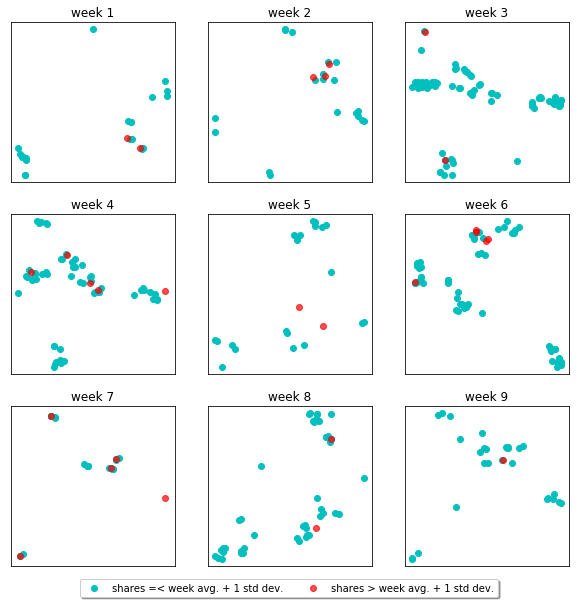

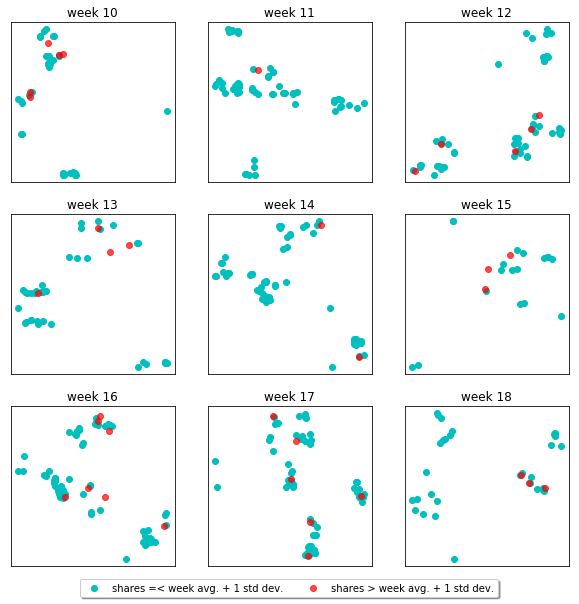

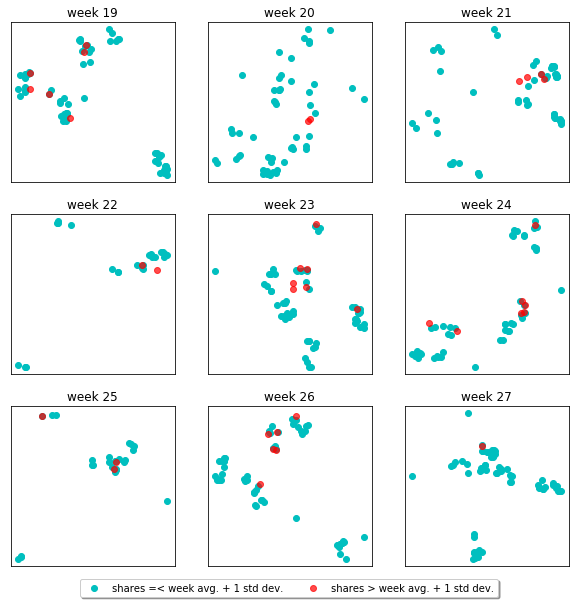

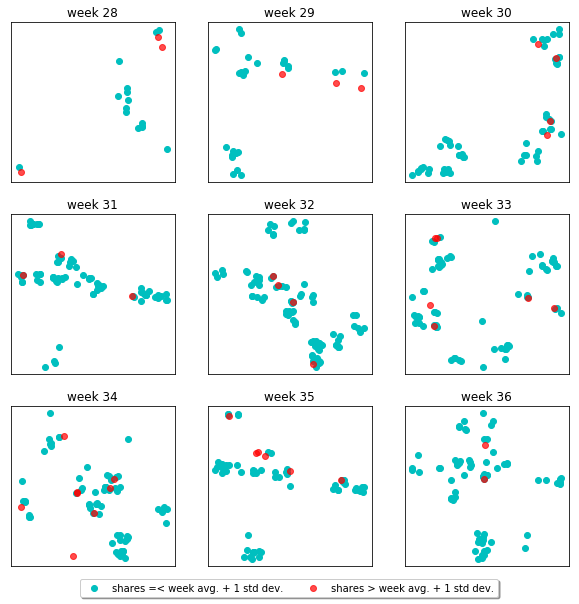

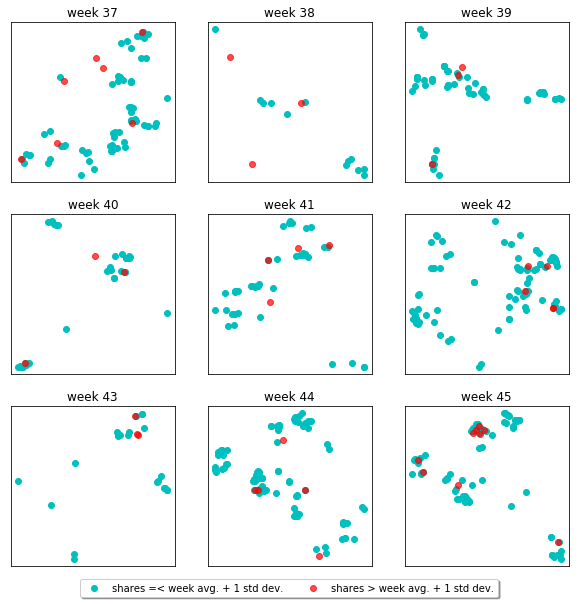

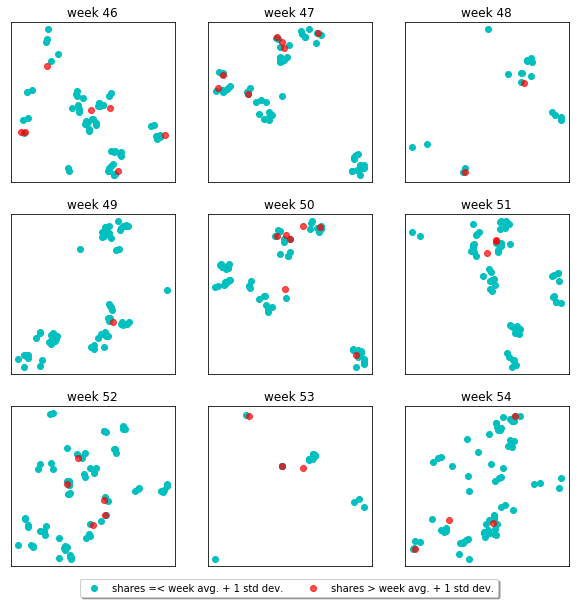

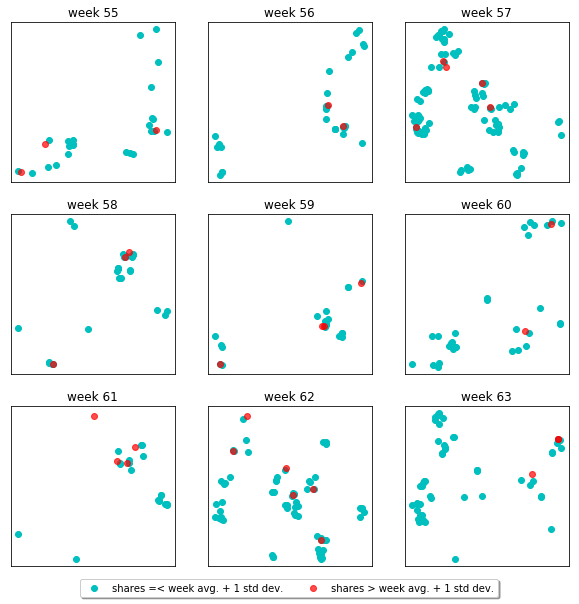

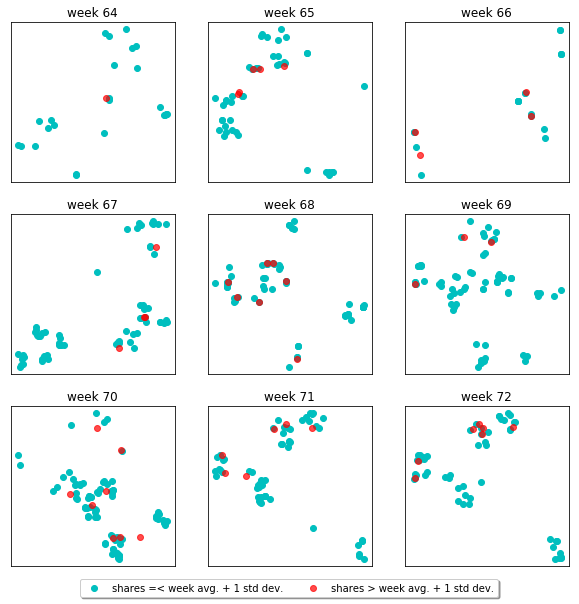

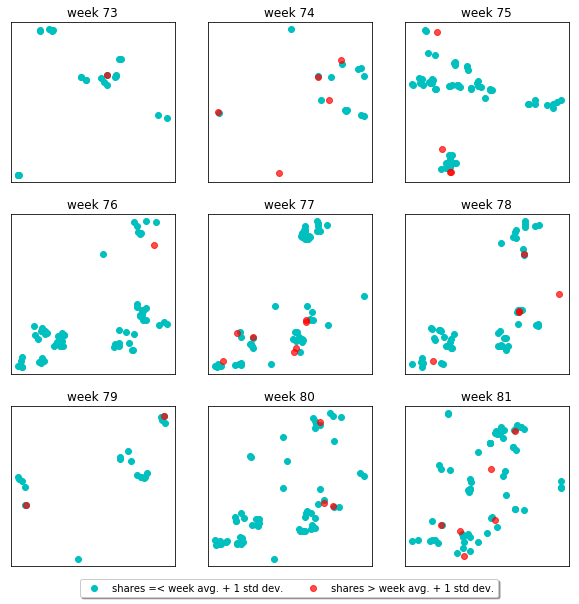

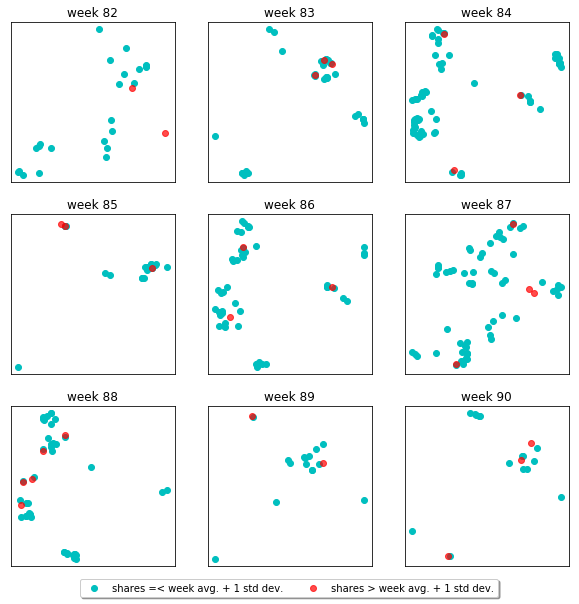

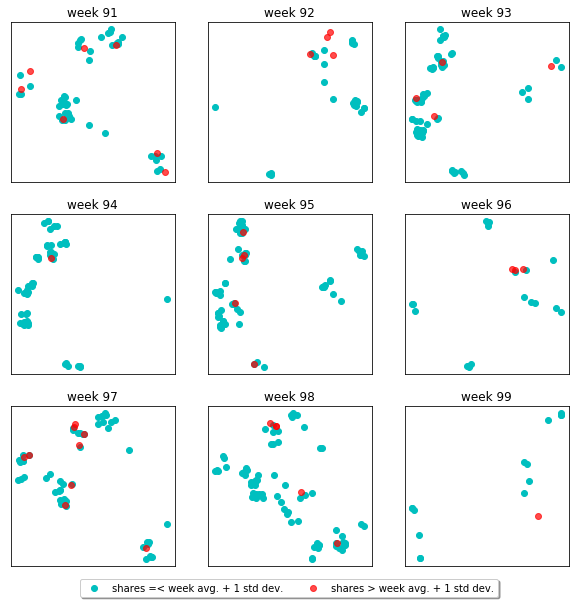

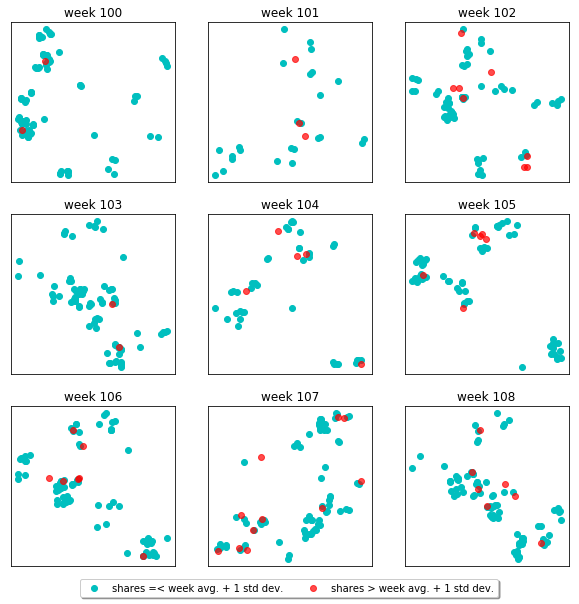

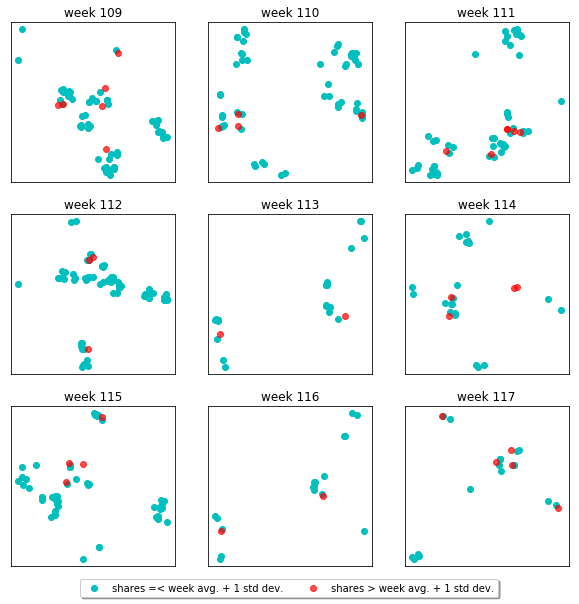

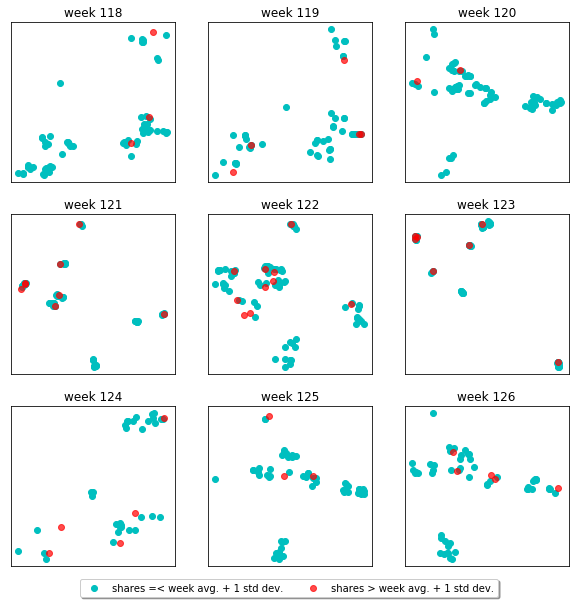

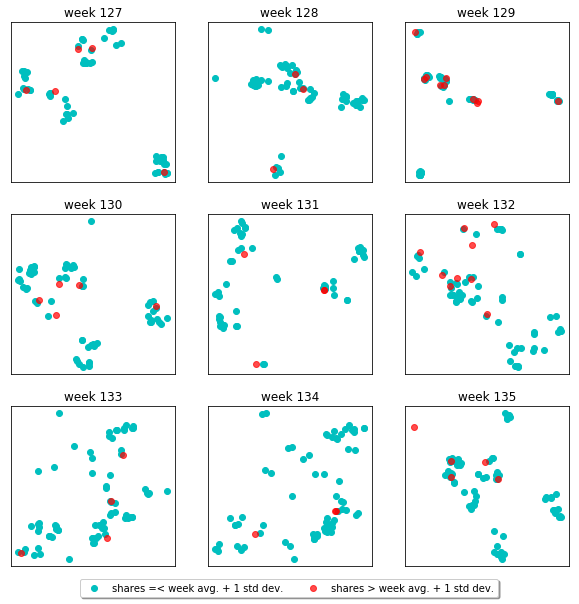

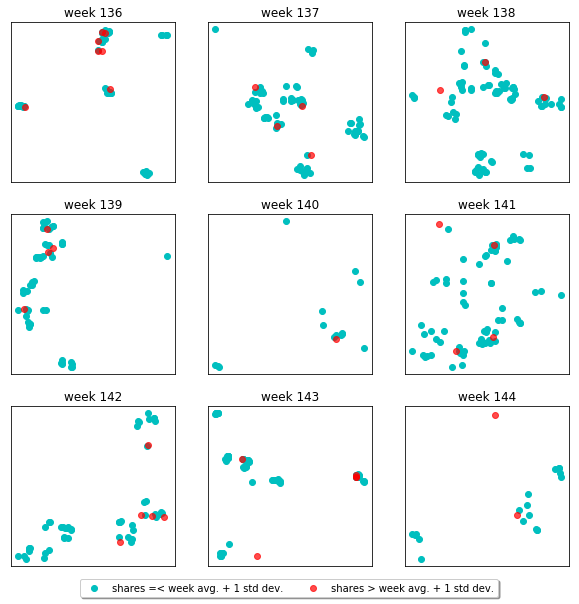

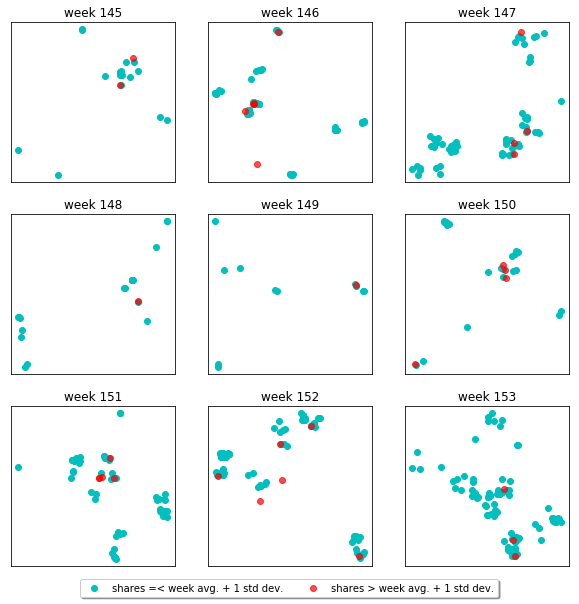

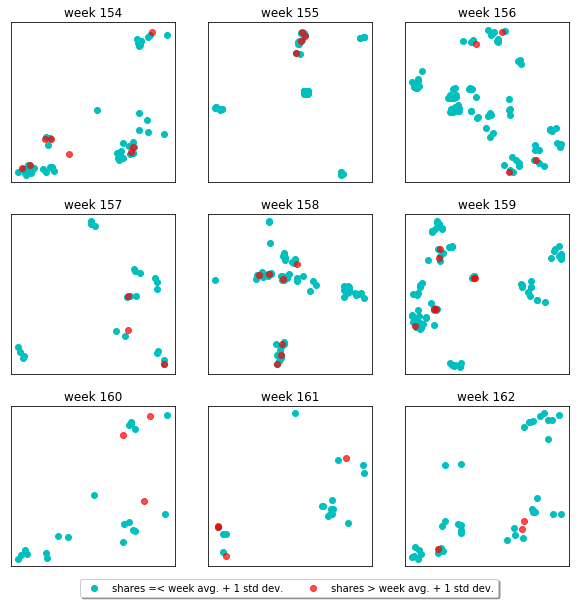

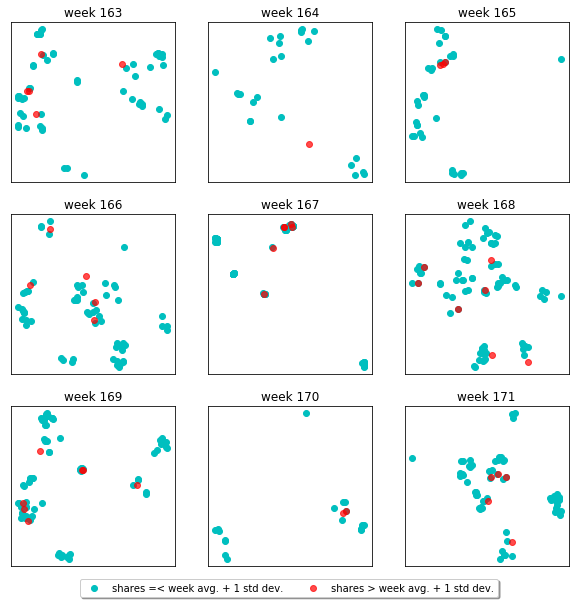

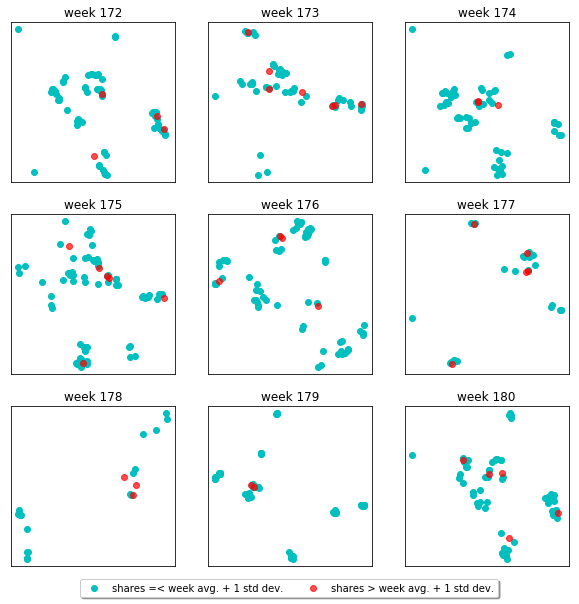

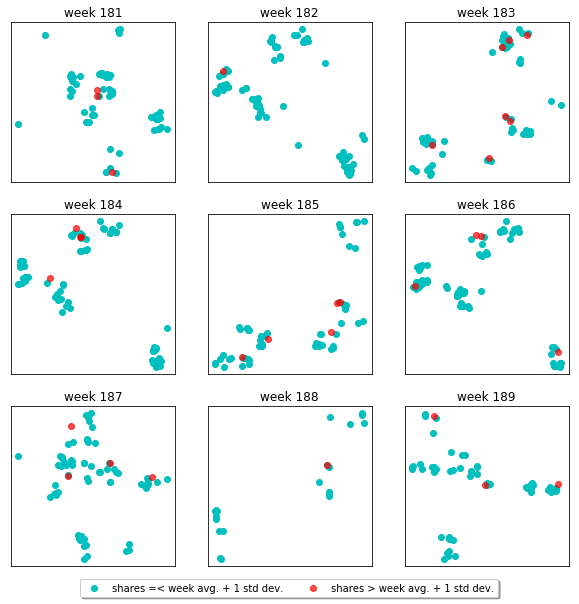

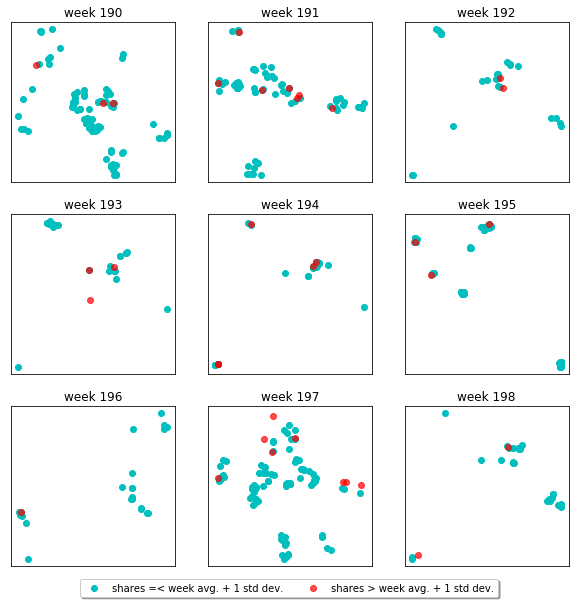

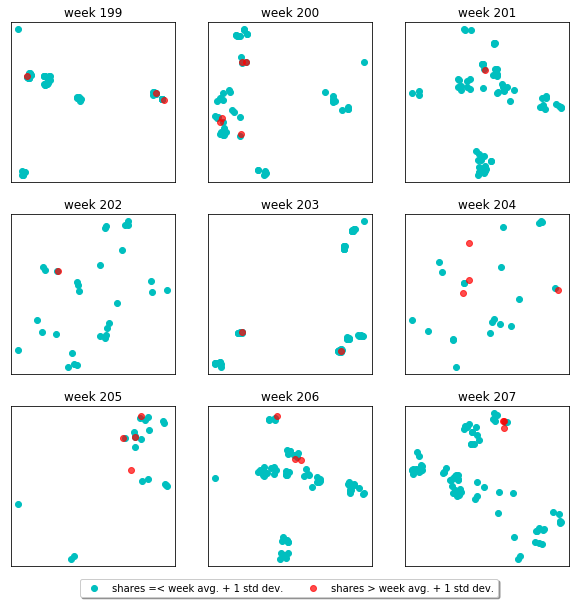

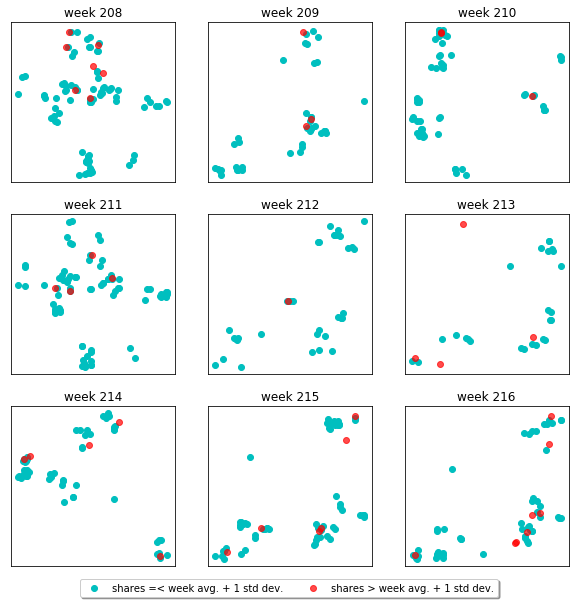

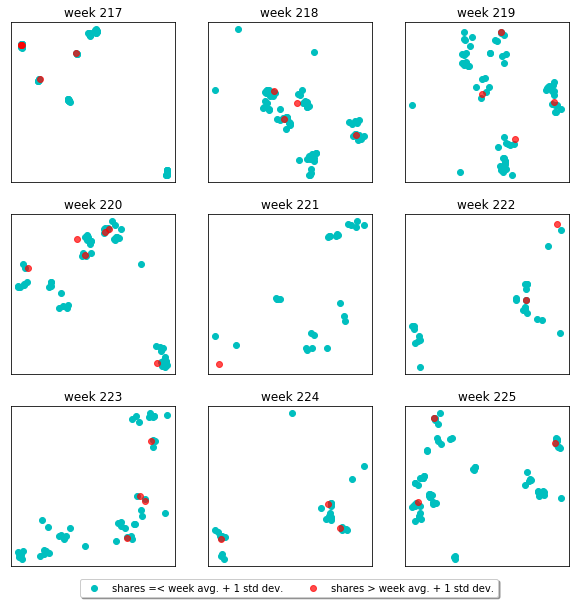

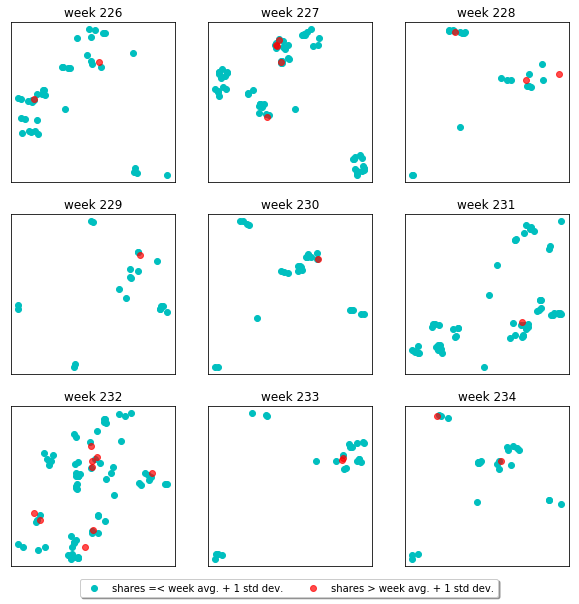

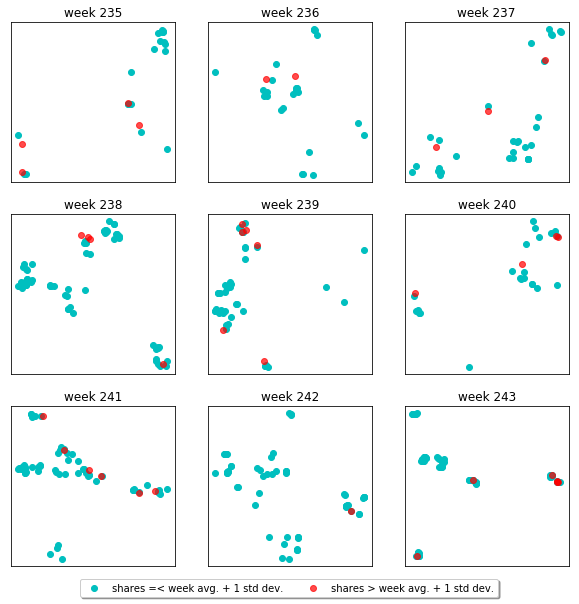

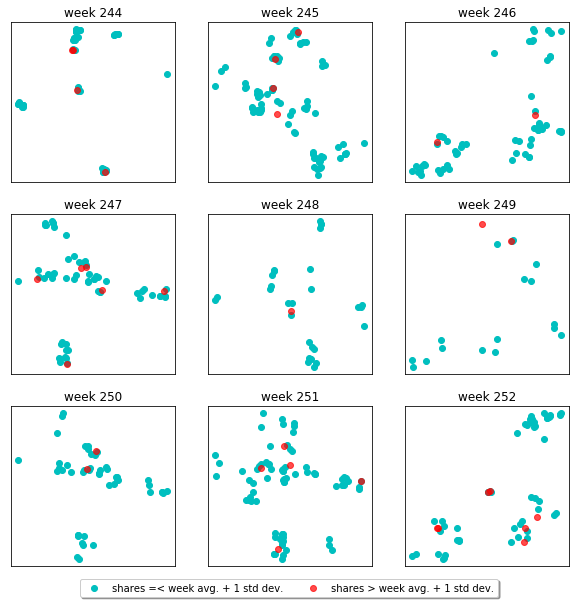

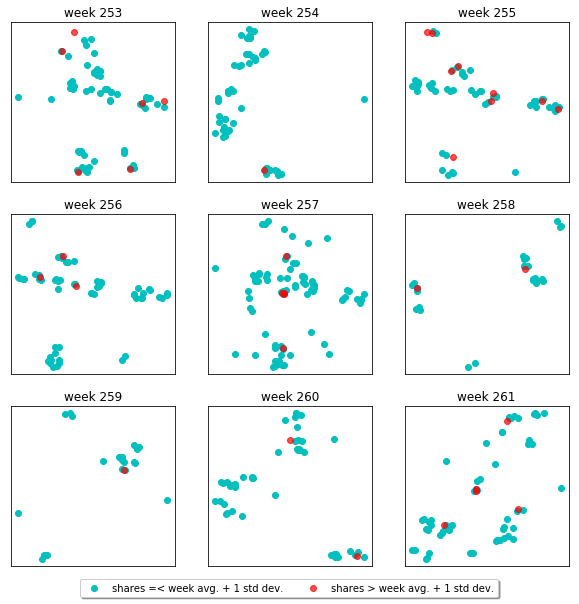

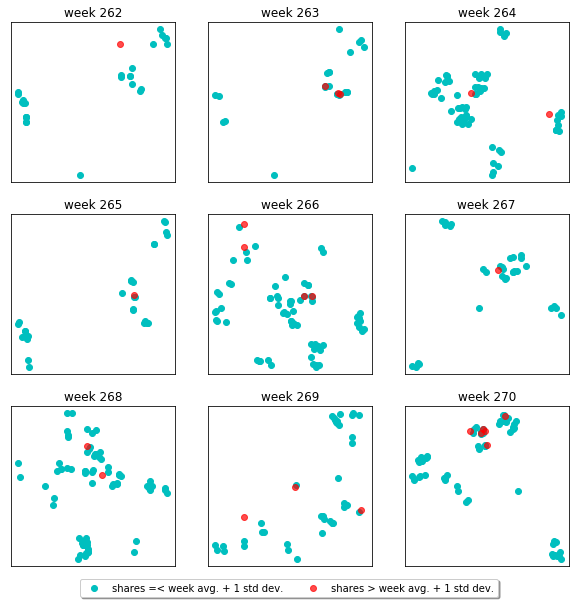

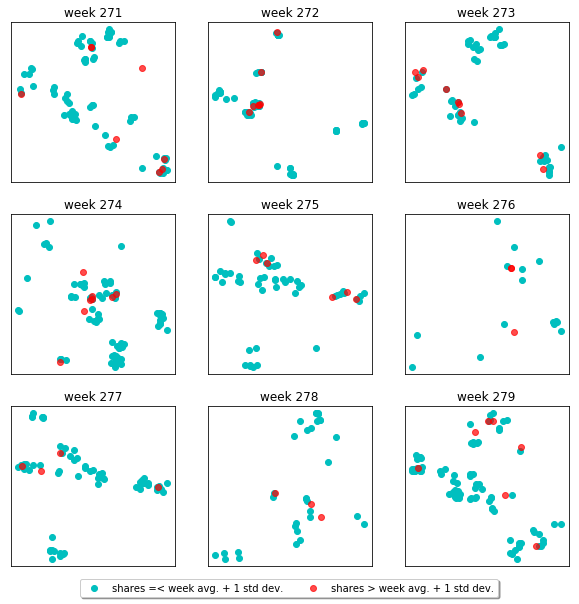

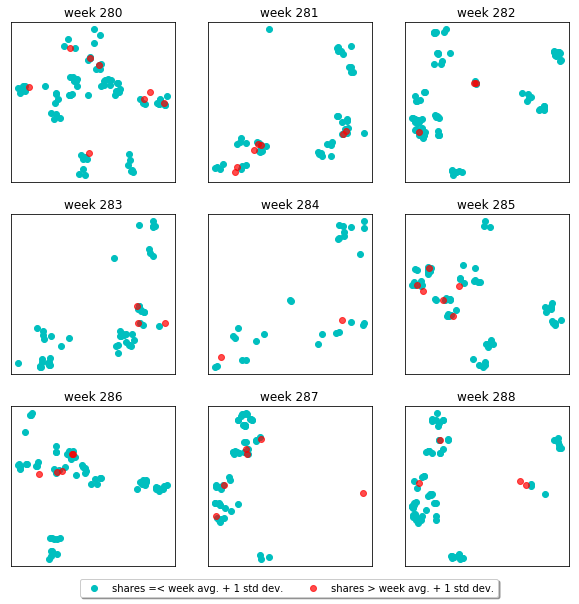

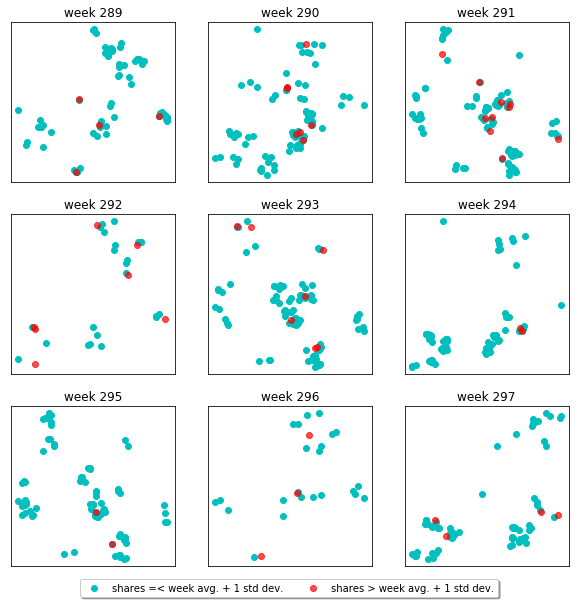

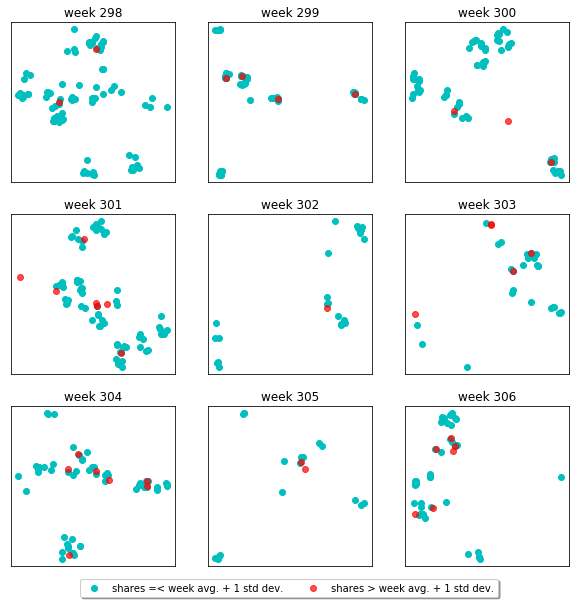

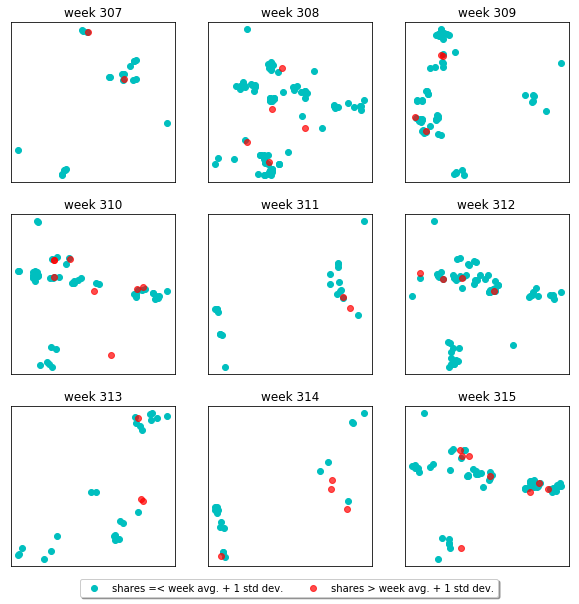

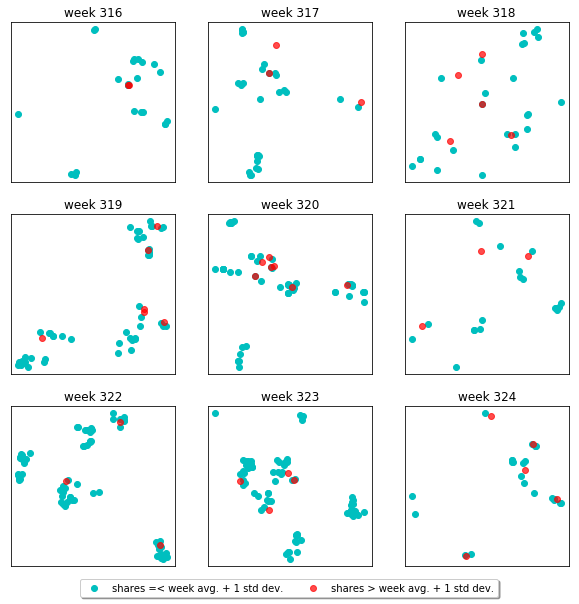

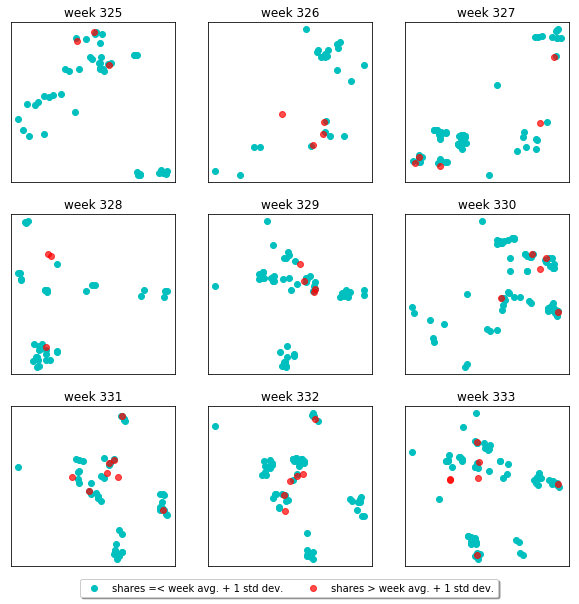

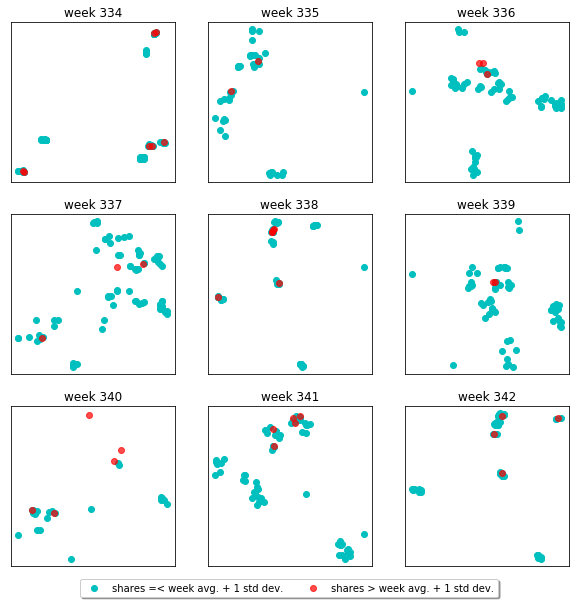

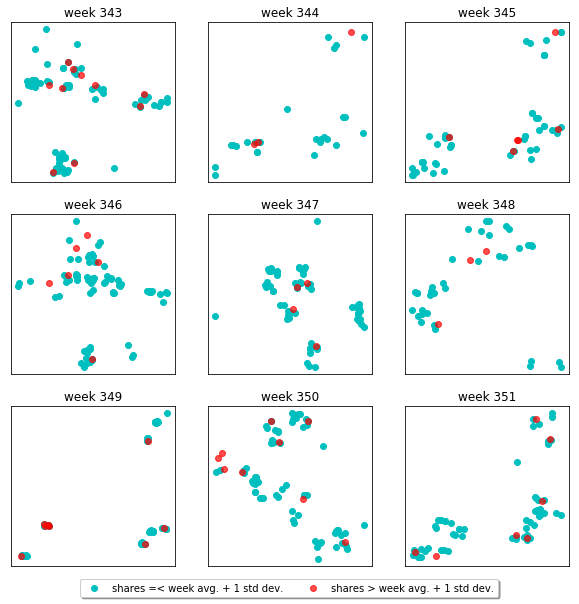

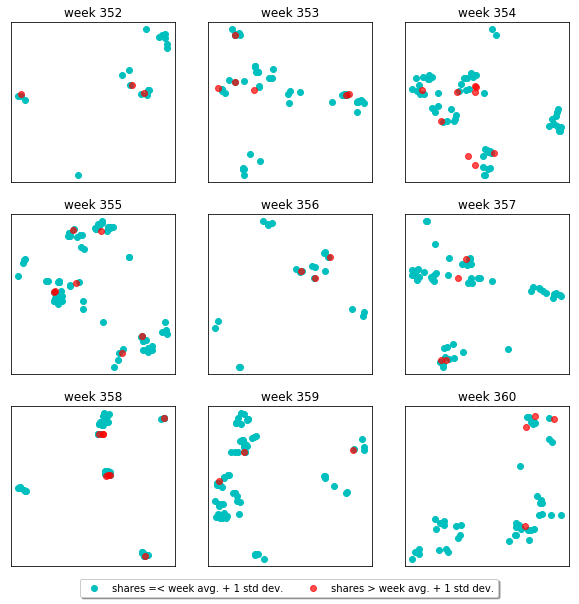

In [115]:
week =1
for i in range(0, 40):
    plt.figure(figsize=(10,10)) 
    #plt.title('TSNE embeddings')
    for j in range(1,10):
        plt.subplot(3,3,j)
        plt.title('week ' + str(week))
        X_emd_week = X_embedded[np.where(week_ids == week)]
        Y_training_week = Y_training[np.where(week_ids == week)]
        X_embedded_above_avg = X_emd_week[np.where(Y_training_week > (Y_training_week.mean() + Y_training_week.std()) )]
        X_embedded_below_avg = X_emd_week[np.where(Y_training_week <= (Y_training_week.mean() + Y_training_week.std()) )]
        #plt.scatter(X_embedded[:,0], X_embedded[:,1], alpha = 1)#cmap=plt.cm.rainbow)
        plt.scatter(X_embedded_below_avg[:,0], X_embedded_below_avg[:,1], c='c', alpha=1, label = 'shares =< week avg. + 1 std dev.')
        plt.scatter(X_embedded_above_avg[:,0], X_embedded_above_avg[:,1], c='r', alpha=0.7, label='shares > week avg. + 1 std dev.')
        plt.xticks([])
        plt.yticks([])
        week = week + 1
        
    plt.legend(ncol=2, fancybox=True, shadow=True, bbox_to_anchor=(0.6, -0.05)) 
#     plt.savefig('weeks_'+str(week-9)+'-'+str(week-1))

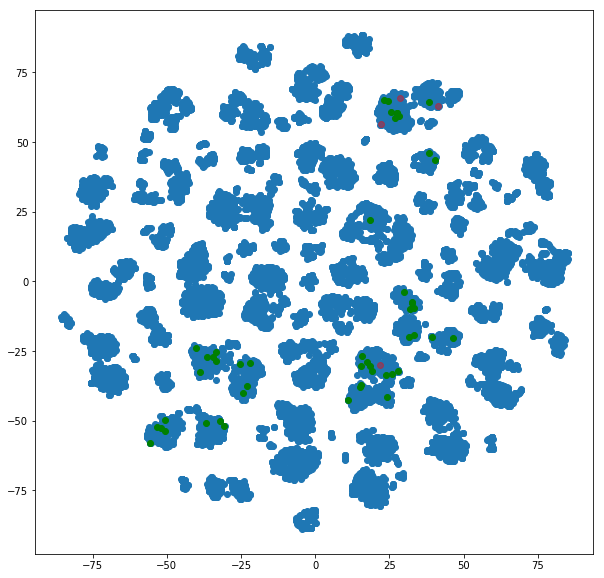

In [116]:
# T-SNE, entire data set  (ignoring qid)
plt.figure(figsize=(10,10))
plt.scatter(X_embedded[:,0], X_embedded[:,1], alpha = 1)#cmap=plt.cm.rainbow)
plt.scatter(X_embedded_below_avg[:,0], X_embedded_below_avg[:,1], c='g', alpha=1)
plt.scatter(X_embedded_above_avg[:,0], X_embedded_above_avg[:,1], c='r', alpha=0.4)

In [121]:
len(week_feats[8])

50

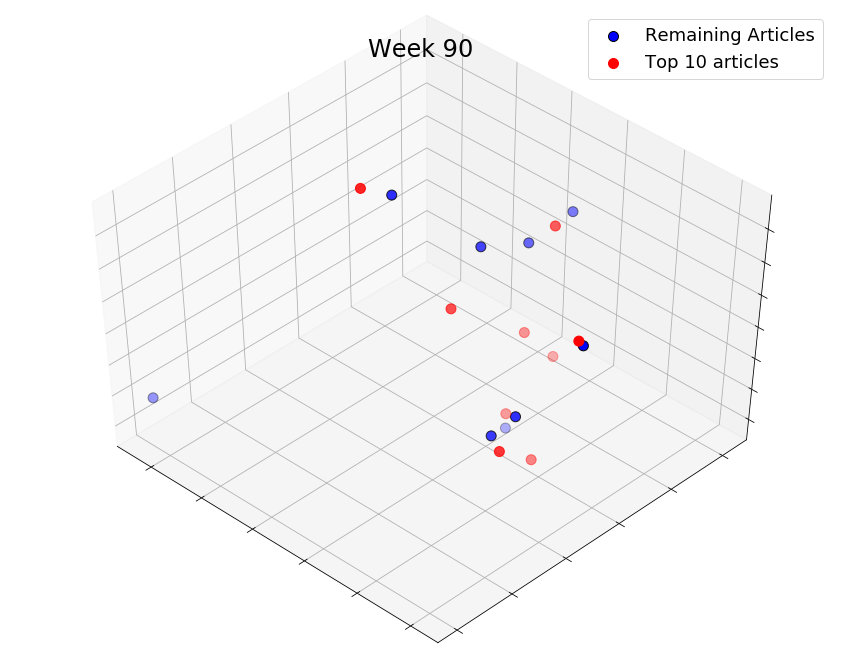

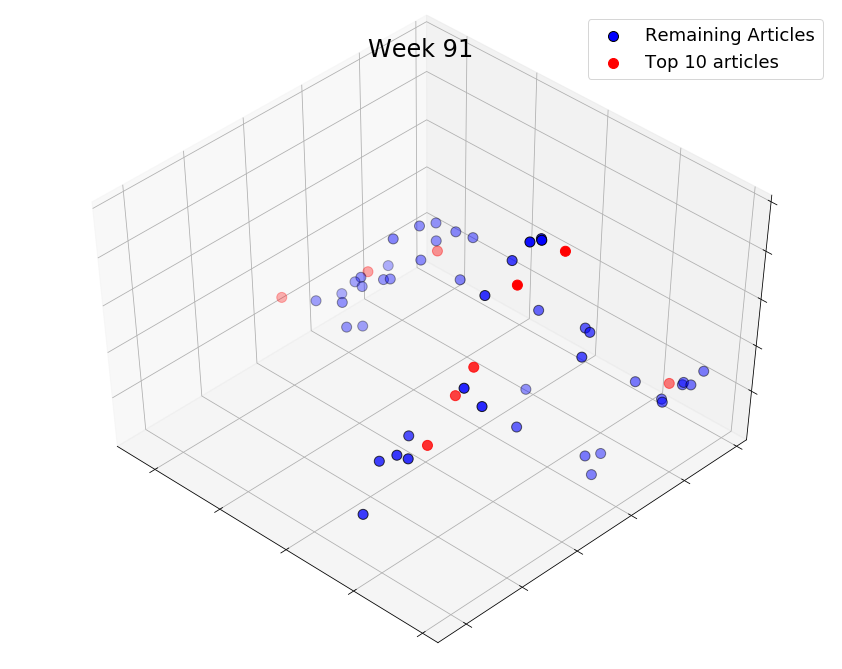

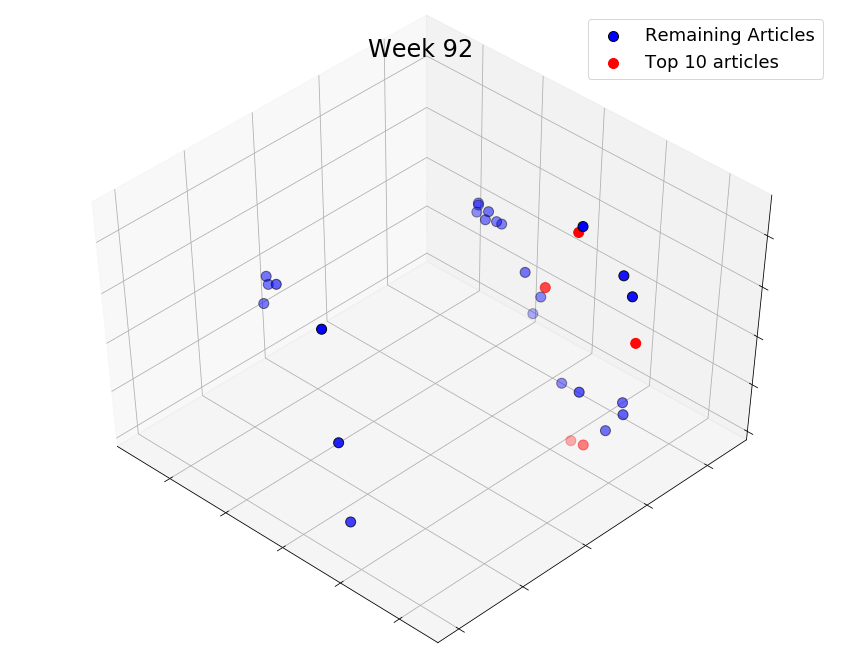

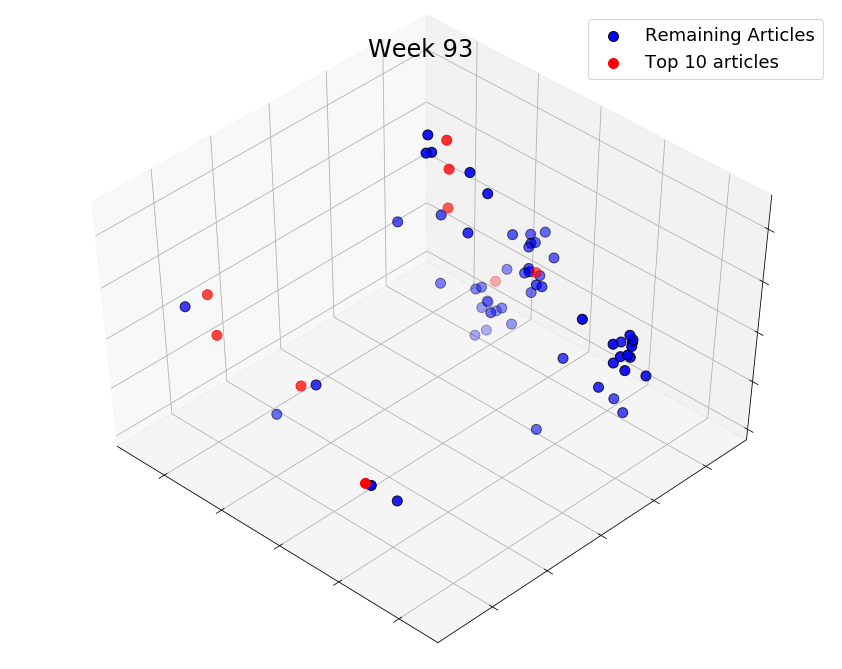

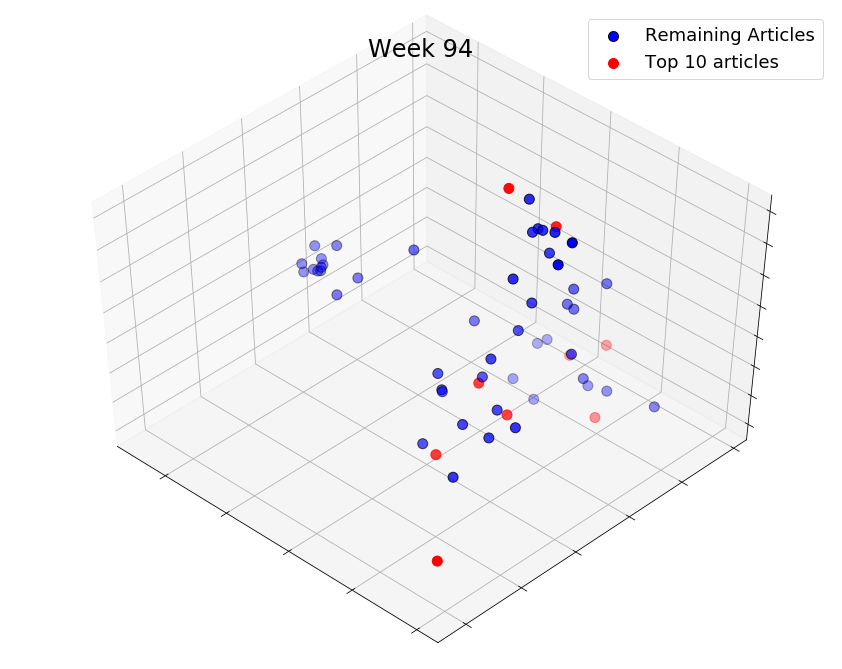

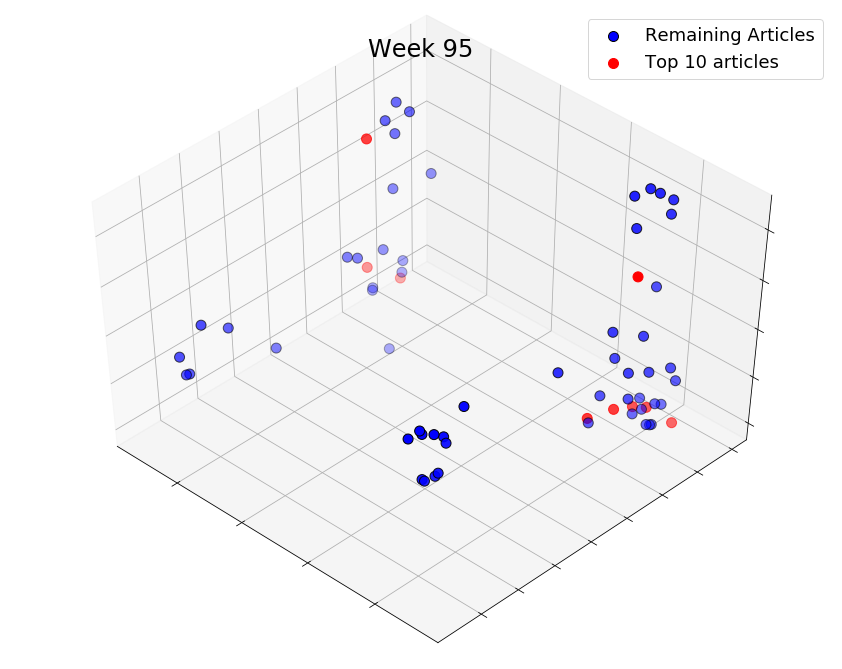

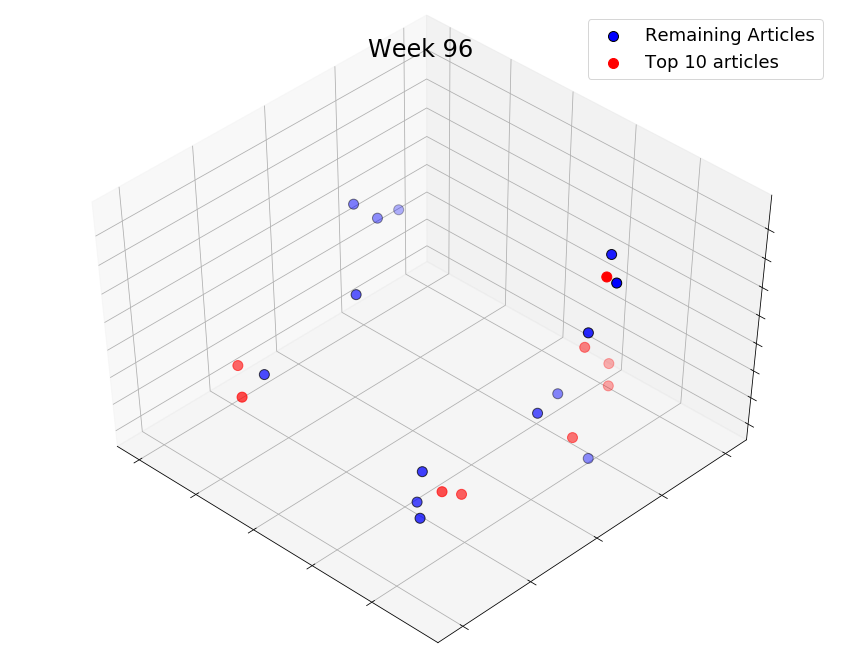

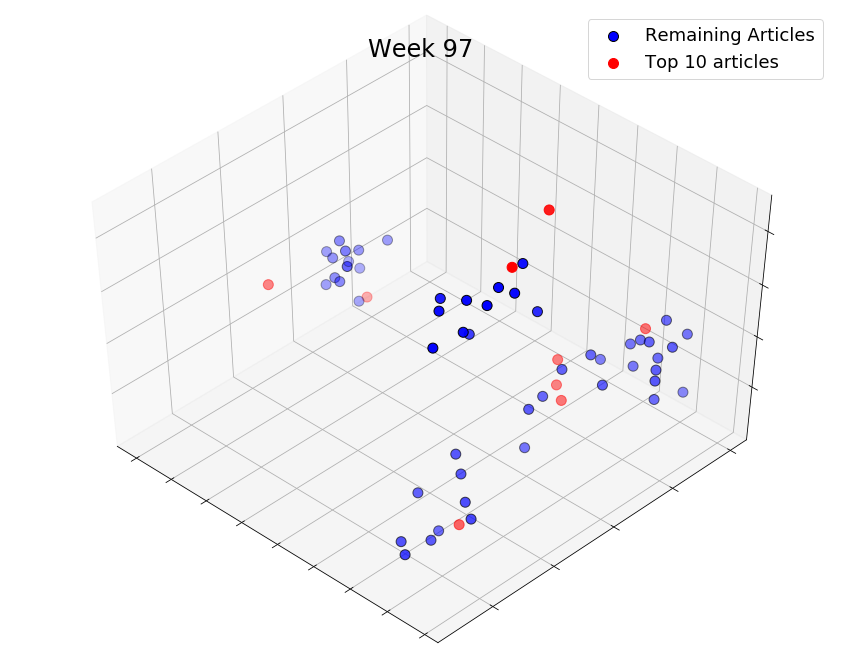

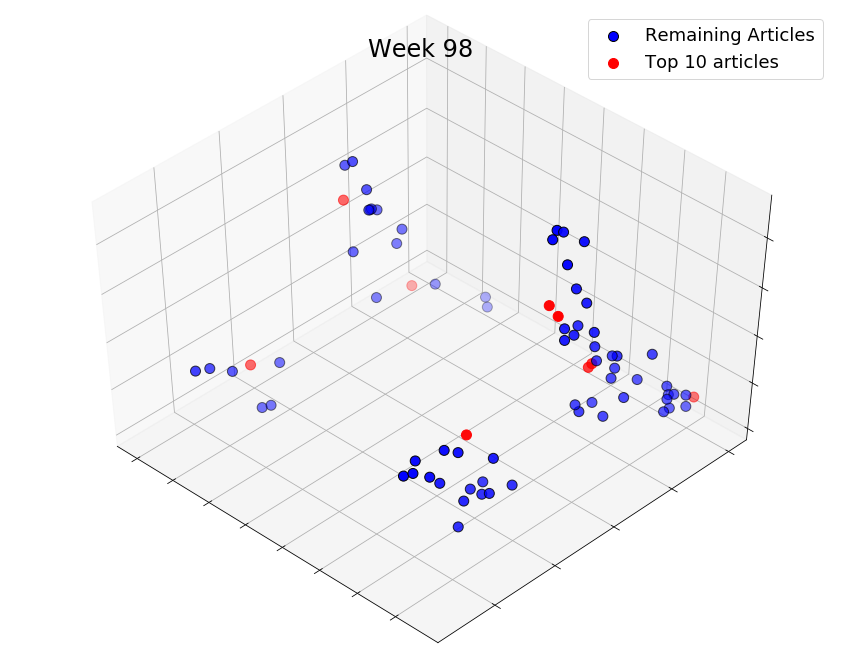

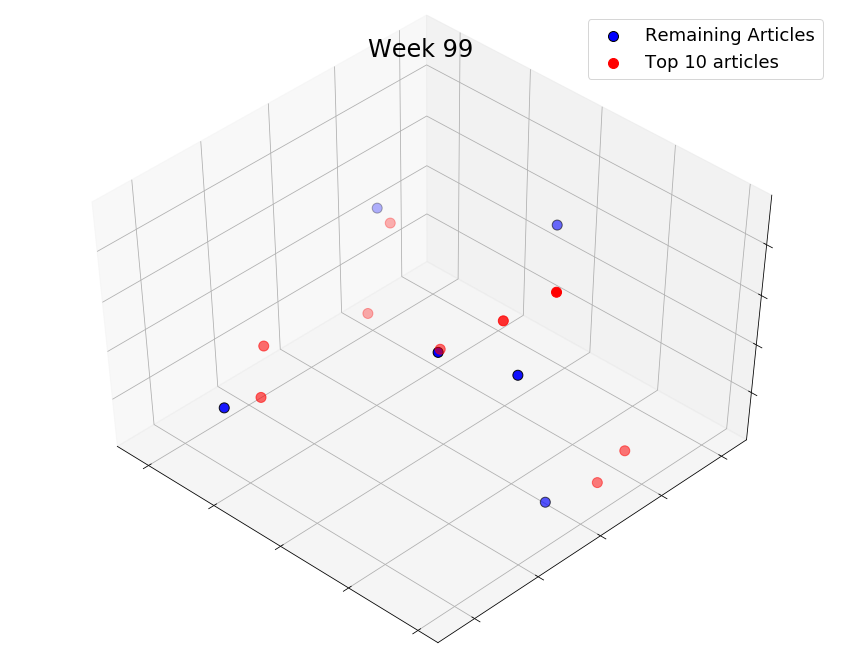

In [119]:
for i in range(90,100):
    PCA_on_week(i, week_feats, week_ys)

In [122]:
# correlation between top 5, 10, 15 and features

In [125]:
?pearsonr

In [127]:
x.shape

(58,)

In [129]:
X_week.shape

(24, 58)

In [128]:
y_week.shape

(24,)

In [154]:
len(Y_training)

20005

In [158]:
week_ids.max()

360

In [218]:
neg_sig_feats = []
pos_sig_feats = []
for week in range(1, week_ids.max()+1):
    X_week = week_feats[week]
    y_week = week_ys[week]
    count = 1
    for x in np.transpose(X_week):
        r, p = pearsonr(y_week, x)
        if p <0.05:
            print(r,p, 'week qid:', week, ' feat num: ', count)
            sig_feats.append(count)
            if r>0:
                pos_sig_feats.append(count)
            elif r <0:
                neg_sig_feats.append(count)
        count = count +1
    
        

0.6045059457380237 0.0017551075511759474 week qid: 1  feat num:  2
0.45650652873522063 0.02493910867691918 week qid: 1  feat num:  25
0.41578795081140146 0.04330620806278483 week qid: 1  feat num:  26
-0.4418771985718437 0.03062827993076375 week qid: 1  feat num:  53
0.5193782159896626 0.013242661424168661 week qid: 2  feat num:  12
0.6422504136472609 0.00126954179281596 week qid: 2  feat num:  21
0.510330881278246 0.015237503064394949 week qid: 2  feat num:  24
0.5723034764444163 0.005381167471676481 week qid: 2  feat num:  41
0.6499236971190435 2.803521275608134e-10 week qid: 3  feat num:  12
0.4396238396534797 7.938997184055651e-05 week qid: 3  feat num:  25
0.3879802567733344 0.0005831156488329357 week qid: 3  feat num:  26
0.5263973926832781 0.011846223857819149 week qid: 5  feat num:  6
0.8679684681516364 1.6661280831152623e-07 week qid: 5  feat num:  15
0.6075324660204869 0.0027094579545212903 week qid: 5  feat num:  38
0.5103479595340452 1.0244250780758373e-05 week qid: 6  feat

0.3127675074701463 0.01682892859877391 week qid: 94  feat num:  55
0.28518264967154017 0.030015399237533723 week qid: 94  feat num:  56
0.2898171096161559 0.02733285704708664 week qid: 94  feat num:  58
0.4689800226563986 7.131432538703859e-05 week qid: 95  feat num:  8
0.46972113913239066 6.920977408714449e-05 week qid: 95  feat num:  21
0.3726435729090042 0.002060776945981332 week qid: 95  feat num:  23
0.24659865094474576 0.045929512528596506 week qid: 95  feat num:  41
-0.5117115776490492 0.012563120083541313 week qid: 96  feat num:  1
0.47566053394177643 0.021786473225575764 week qid: 96  feat num:  8
0.4624185856956395 0.026305399812161064 week qid: 96  feat num:  12
0.47850036135107105 0.02090408722246031 week qid: 96  feat num:  25
0.44286127728846436 0.03431931134899701 week qid: 96  feat num:  27
0.44086243012891707 0.035236560471291034 week qid: 96  feat num:  28
0.43737593869825925 0.036882734497642164 week qid: 96  feat num:  29
0.6553424687792176 0.0006881467061582127 wee

0.28523280719064875 0.016692616980725196 week qid: 176  feat num:  8
0.4685449654517602 4.300617347452523e-05 week qid: 176  feat num:  19
0.38614399188471576 0.0009613573357341632 week qid: 176  feat num:  20
0.4848427775277768 2.1051188639399036e-05 week qid: 176  feat num:  25
0.517702844041656 4.440975013567222e-06 week qid: 176  feat num:  26
0.6644008881363871 3.587587867498492e-10 week qid: 176  feat num:  27
0.6318115371679626 4.4850995160516586e-09 week qid: 176  feat num:  28
0.6727420185128236 1.7859947430720845e-10 week qid: 176  feat num:  29
0.29355688215358794 0.013645823273684231 week qid: 176  feat num:  41
-0.2886767334370503 0.015367735821233635 week qid: 176  feat num:  56
0.38793681570796223 0.028241081723688593 week qid: 177  feat num:  11
0.36387529911502553 0.040630924909769904 week qid: 177  feat num:  19
0.4069511762016524 0.02080315063011952 week qid: 177  feat num:  25
0.37548975275831104 0.034194610256499766 week qid: 177  feat num:  26
0.4406785861107515 0

0.34921119403702783 0.006242754586015967 week qid: 255  feat num:  27
0.33857206923782146 0.008143897026928247 week qid: 255  feat num:  29
0.29828586616191394 0.020619563496989415 week qid: 255  feat num:  51
0.27415862119926704 0.031060554285188377 week qid: 256  feat num:  23
0.25616775941227515 0.04446424224964262 week qid: 256  feat num:  24
0.3718533521610214 0.002921326843605523 week qid: 256  feat num:  25
0.34700429633662794 0.005724946974374245 week qid: 256  feat num:  26
0.3049121174019173 0.015965328229973836 week qid: 256  feat num:  28
0.2815136294240129 0.026652644388845244 week qid: 256  feat num:  29
-0.25708891846976556 0.04367807253931297 week qid: 256  feat num:  57
0.21999950817120412 0.034095656574519594 week qid: 257  feat num:  1
-0.251720080571021 0.014933032206203053 week qid: 257  feat num:  48
0.25522500467801573 0.013547238426592542 week qid: 257  feat num:  50
0.31134489256558473 0.002383306865984966 week qid: 257  feat num:  52
0.2714822580320824 0.00848

-0.28180419426069814 0.016477664361601155 week qid: 341  feat num:  52
-0.2777549829871397 0.018163556795174132 week qid: 341  feat num:  53
0.2589547530963075 0.028058911887594233 week qid: 341  feat num:  56
0.24059745643639813 0.041768653218395575 week qid: 341  feat num:  58
0.31016682527204015 0.019996024460871308 week qid: 342  feat num:  11
0.2922016863048665 0.00943407799619527 week qid: 343  feat num:  21
0.23608981042760072 0.03743941941226656 week qid: 343  feat num:  25
0.33625080125486706 0.002613299087280624 week qid: 343  feat num:  26
0.28034933528739386 0.012916037883792615 week qid: 343  feat num:  28
0.23010573103448592 0.04269187803294295 week qid: 343  feat num:  29
0.39582815926384296 0.03706407121963759 week qid: 344  feat num:  6
0.4015376840783807 0.03418150895279294 week qid: 344  feat num:  42
-0.3924393430493782 0.038864982300726665 week qid: 344  feat num:  49
0.5264732185622414 2.850575645625253e-06 week qid: 347  feat num:  21
0.2581311350685552 0.0309665

In [206]:
sig_feats.max()


AttributeError: 'list' object has no attribute 'max'

In [201]:
X_training.shape

(20005, 58)

In [202]:
X_training

array([[1.9047620e-01, 9.3344346e-02, 6.4657204e-04, ..., 7.5000000e-01,
        0.0000000e+00, 5.0000000e-01],
       [5.2380955e-01, 3.6228463e-02, 8.0711700e-04, ..., 5.6818200e-01,
        9.0910000e-02, 1.3636400e-01],
       [3.3333334e-01, 5.4165684e-02, 7.2737520e-04, ..., 5.9375000e-01,
        1.2500000e-01, 1.8750000e-01],
       ...,
       [4.2857143e-01, 1.8763276e-02, 9.6606987e-04, ..., 9.2500000e-01,
        1.0000000e+00, 8.5000000e-01],
       [4.7619048e-01, 2.9265990e-02, 8.3981454e-04, ..., 6.6666650e-01,
        0.0000000e+00, 3.3333300e-01],
       [2.3809524e-01, 4.4489026e-02, 7.3254490e-04, ..., 5.0000000e-01,
        1.0000000e+00, 0.0000000e+00]])

In [207]:
np.asarray(sig_feats).max()

58

In [209]:
X_training.shape[1]+1

59

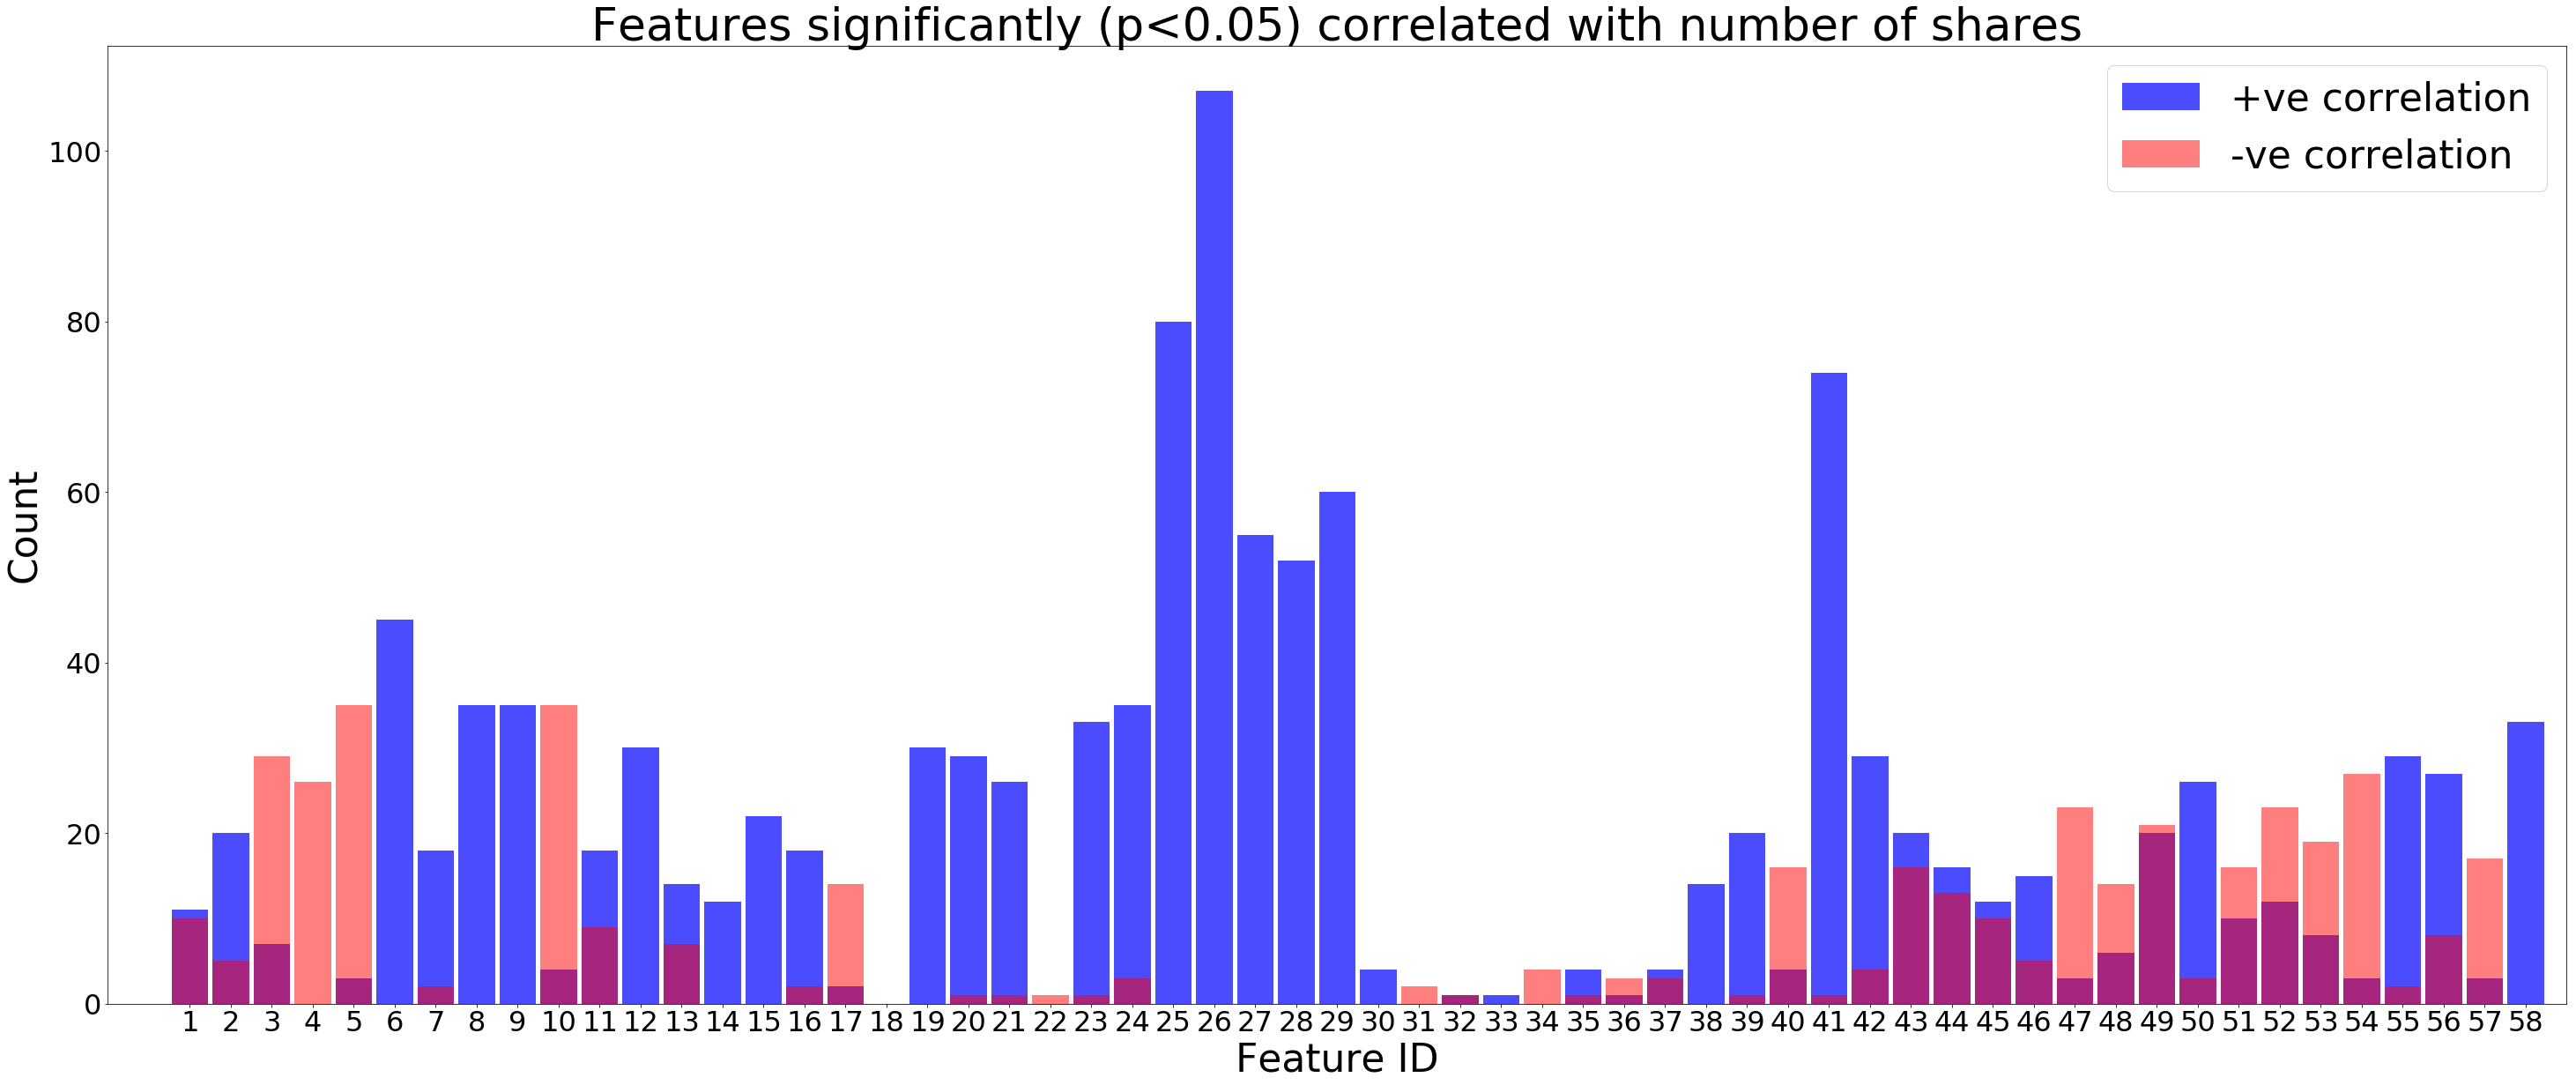

In [228]:
plt.figure(figsize=(50,20))
bins = np.arange(1,X_training.shape[1]+2)  - 0.5
plt.hist(pos_sig_feats,bins = bins, rwidth=0.9, range=(1,X_training.shape[1]+1), alpha = 0.7, color = 'b', label = '+ve correlation')
plt.hist(neg_sig_feats,bins = bins, rwidth=0.9, range=(1,X_training.shape[1]+1), alpha = 0.5, color = 'r', label= '-ve correlation')

plt.ylabel('Count', fontsize = 44)
plt.xlabel('Feature ID', fontsize= 44)
plt.title('Features significantly (p<0.05) correlated with number of shares', fontsize=52)
plt.xticks(range(1,X_training.shape[1]+1), fontsize= 32)
plt.yticks(fontsize= 32)
plt.xlim([-1, X_training.shape[1]+1])
plt.legend(fontsize = 44)

(-1, 59)

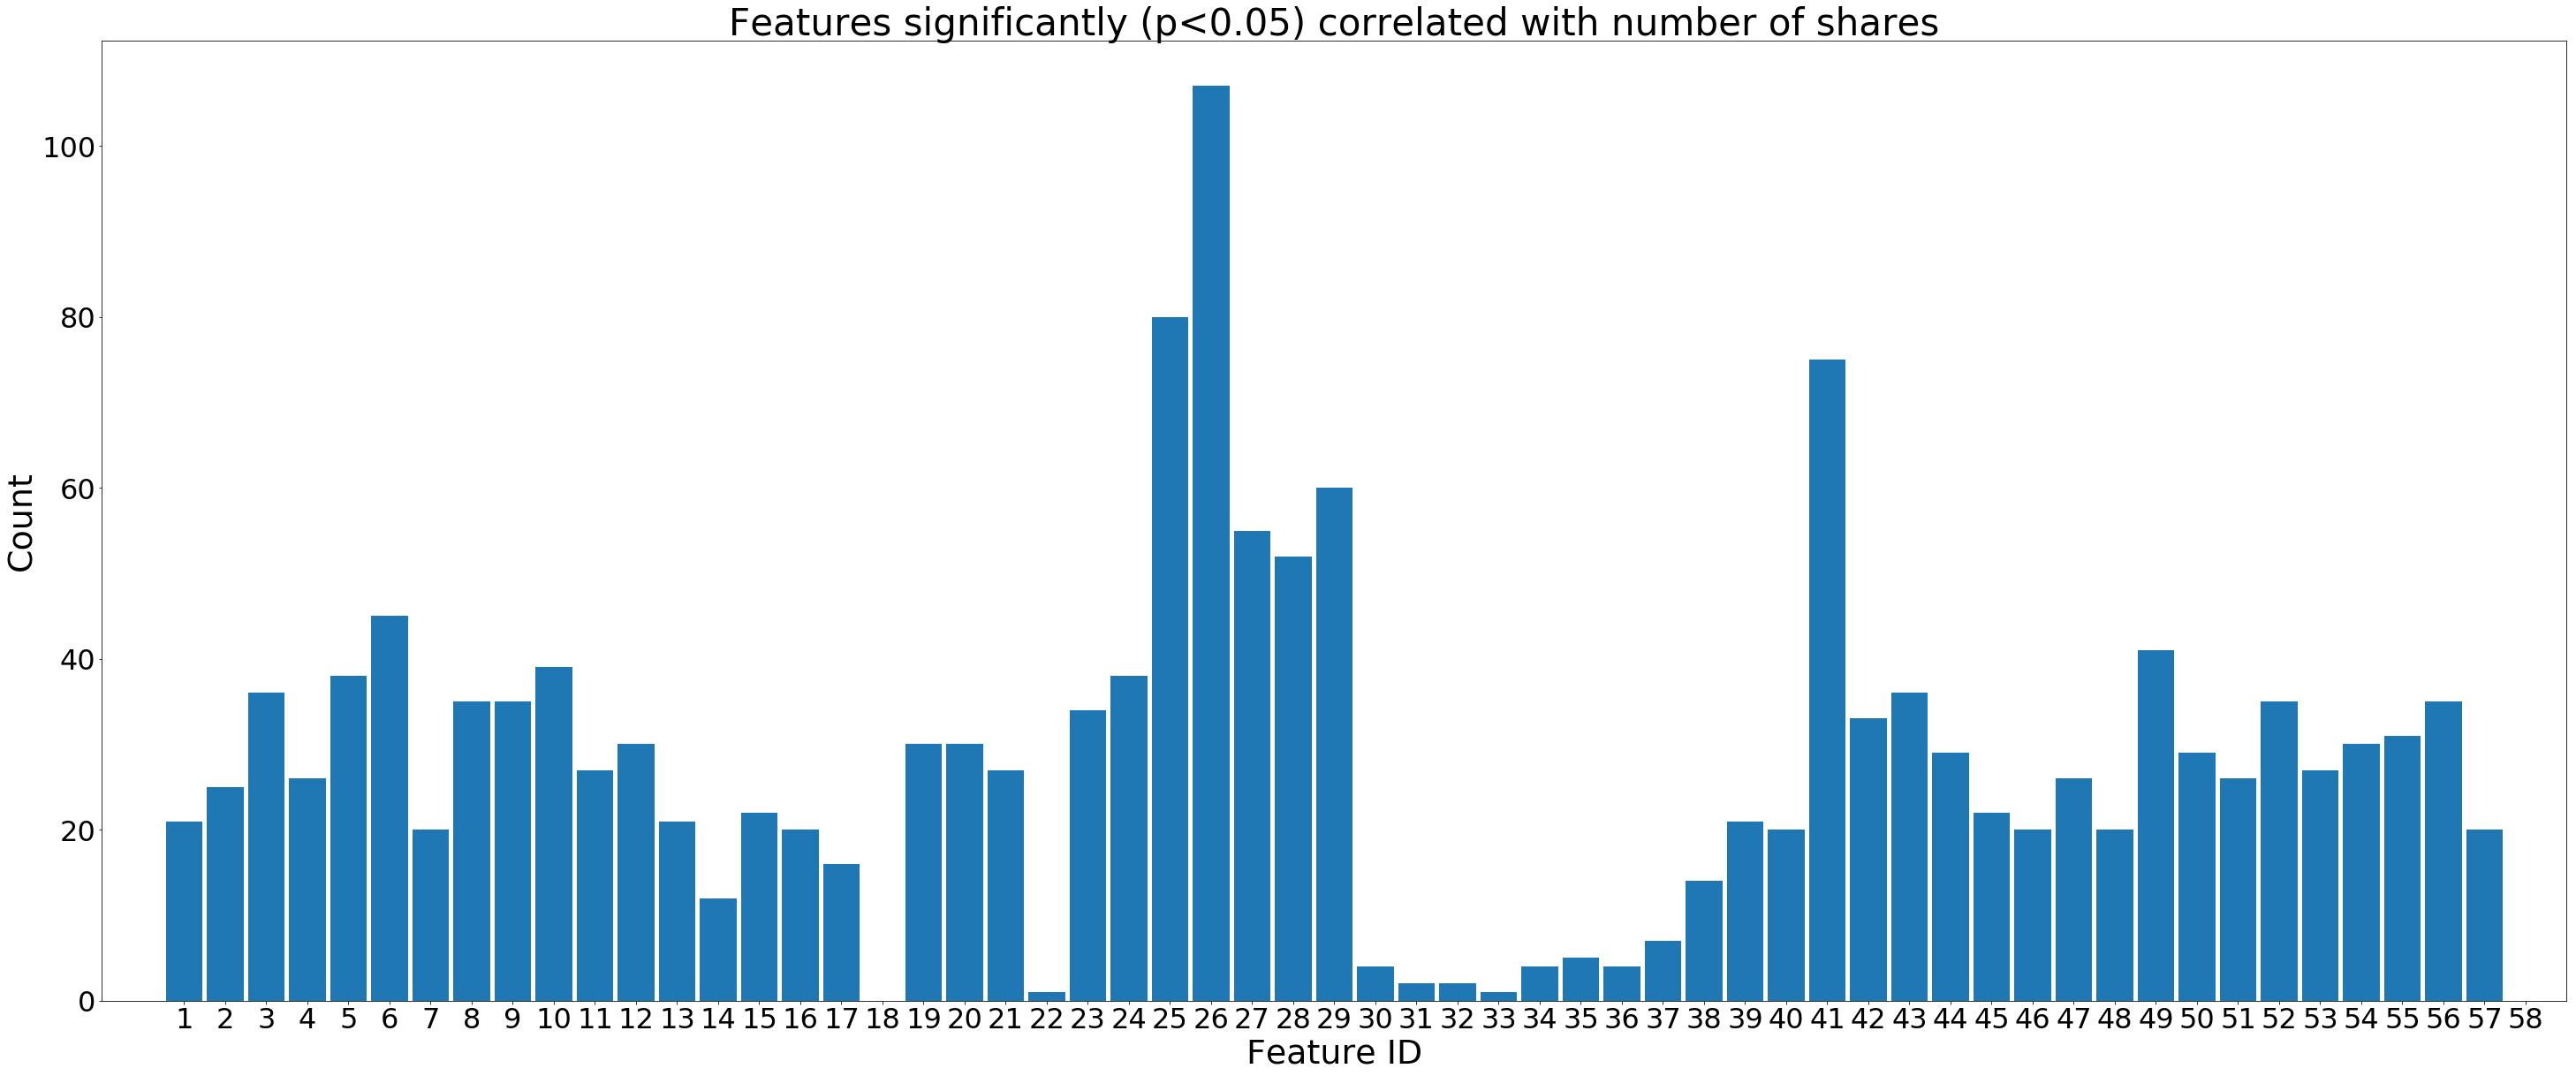

In [213]:
plt.figure(figsize=(50,20))
bins = np.arange(1,X_training.shape[1]+1)  - 0.5
plt.hist(sig_feats, bins = bins, rwidth=0.9, range=(1,X_training.shape[1]+1))
plt.ylabel('Count', fontsize = 38)
plt.xlabel('Feature ID', fontsize= 38)
plt.title('Features significantly (p<0.05) correlated with number of shares', fontsize=42)
plt.xticks(range(1,X_training.shape[1]+1), fontsize= 32)
plt.yticks(fontsize= 32)
plt.xlim([-1, X_training.shape[1]+1])

(-1, 59)

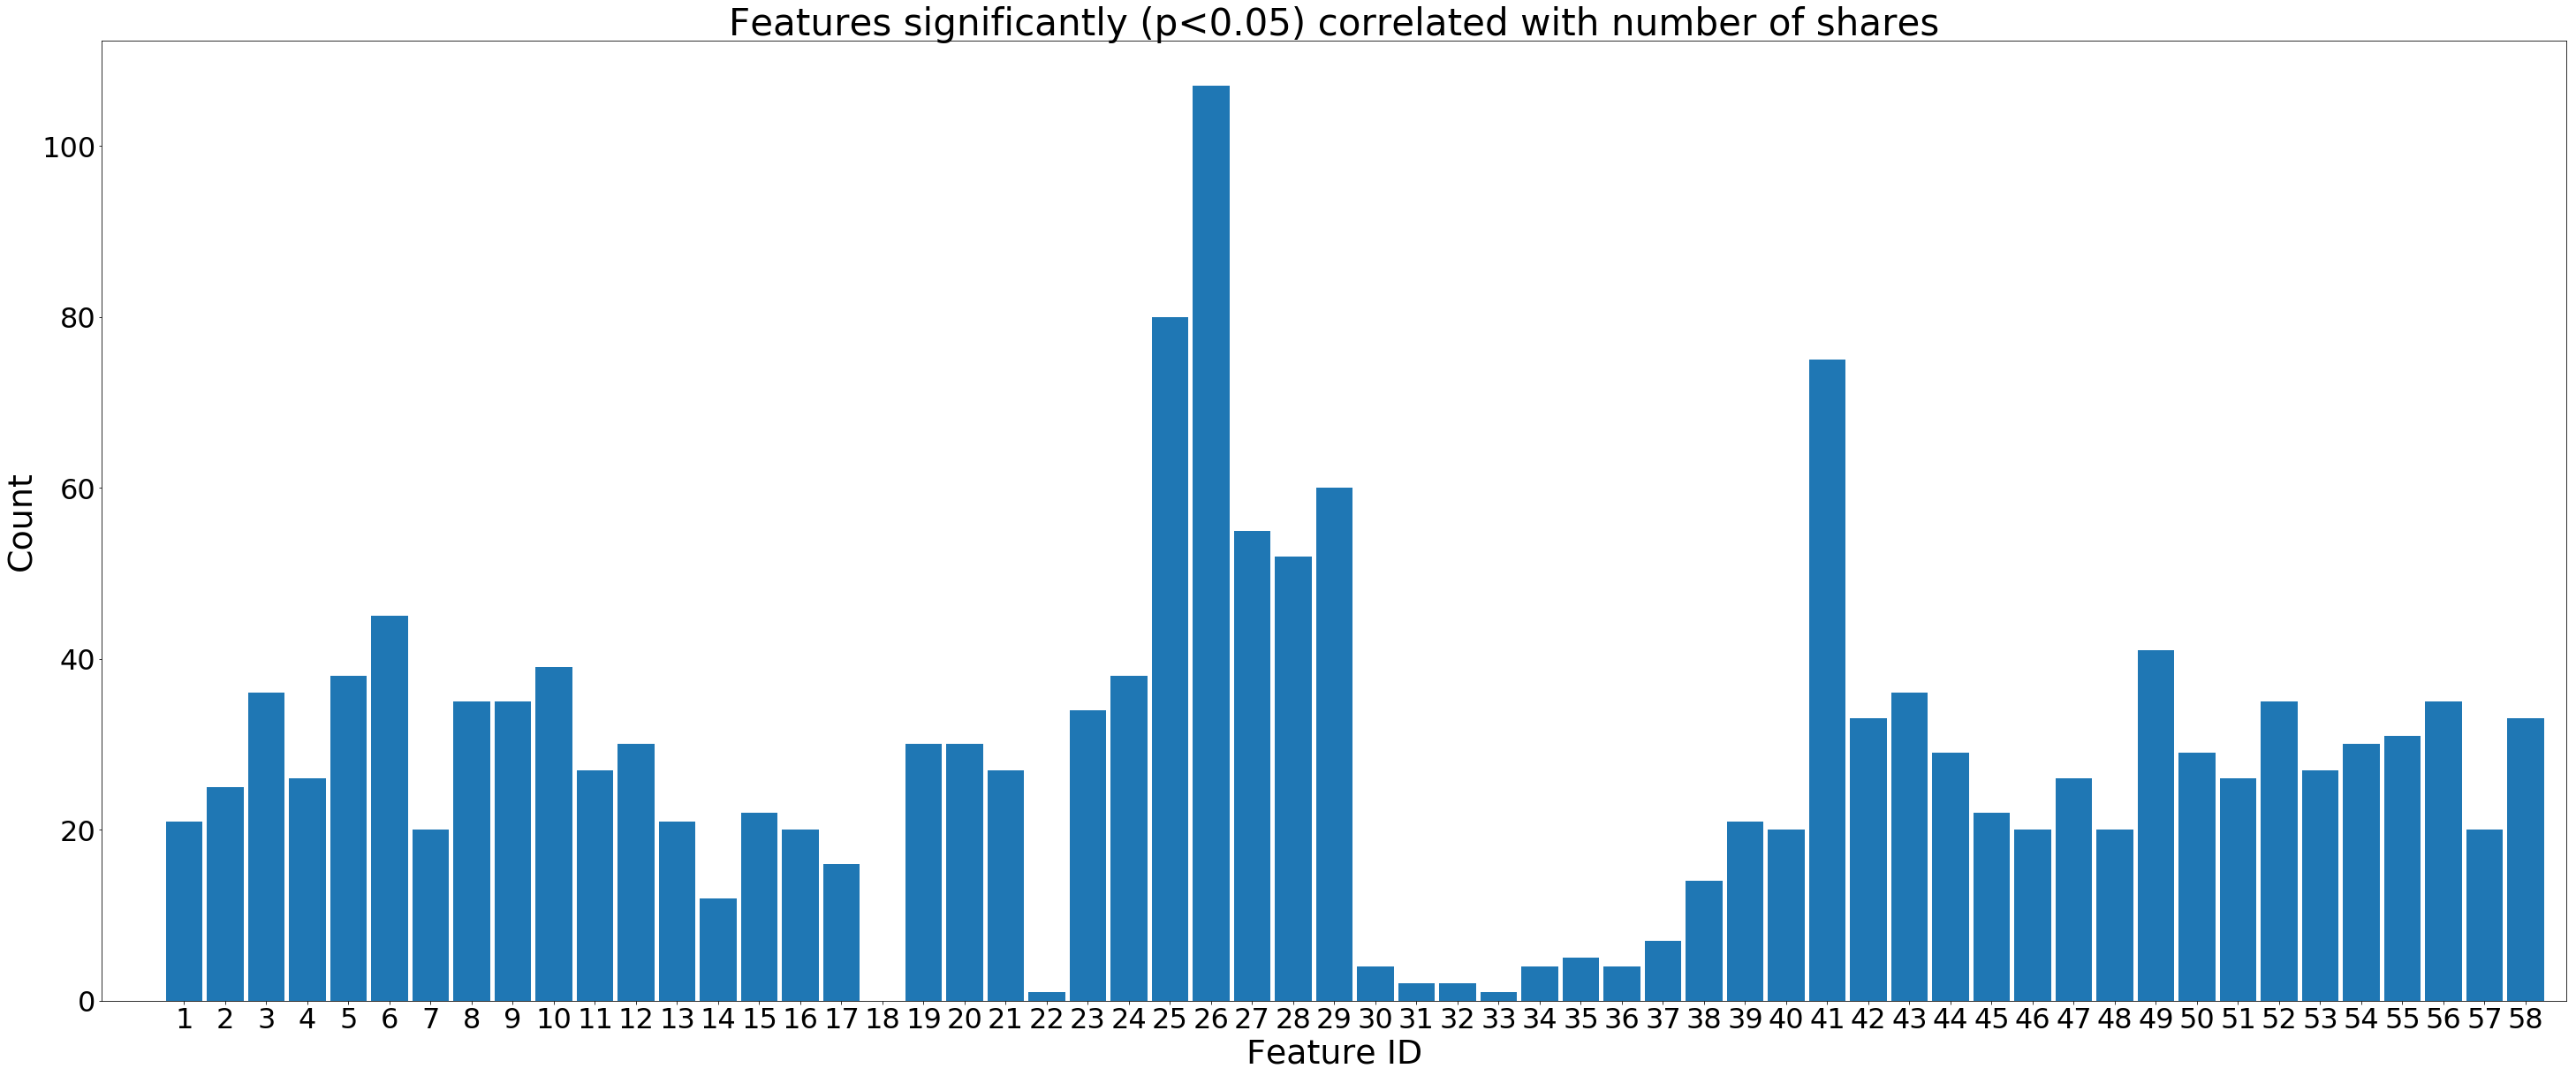

In [212]:
plt.figure(figsize=(50,20))
bins = np.arange(1,X_training.shape[1]+2)  - 0.5
plt.hist(sig_feats, bins = bins, rwidth=0.9, range=(1,X_training.shape[1]+1))
plt.ylabel('Count', fontsize = 38)
plt.xlabel('Feature ID', fontsize= 38)
plt.title('Features significantly (p<0.05) correlated with number of shares', fontsize=42)
plt.xticks(range(1,X_training.shape[1]+1), fontsize= 32)
plt.yticks(fontsize= 32)
plt.xlim([-1, X_training.shape[1]+1])

## FIN.